In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

In [9]:
#For a capillary. 
D_baseline = 8 # micro m 
F_baseline = 0.008663
optimised_value_tau = 2.292929292929293
#optimised_value_tau = 1

#phi = D/D_baseline
#f = F/F_baseline
no = 1000

phi_min_baseline = 0.153

#f = pd.Series(np.zeros(100))
#f[0] = 0.5
f = 0

n=1
phi_min = 1 - (1 - phi_min_baseline)*(1-f)**n

def model(phi,t):
        dphidt = (1/optimised_value_tau)*( -phi + f*(1-phi_min) + phi_min )
        return dphidt

#time points
#t = np.linspace(0,80,no)

#def take_phi(phi,t,f,phi_min):
#     phi = odeint(model,phi_0,t)[0]

f = pd.Series(np.zeros(no))
f[0] = 0.2
phi = pd.Series(np.zeros(no))
phi[0] = 1
phi_min = pd.Series(np.zeros(no))
phi_min[0] = phi_min_baseline
t = pd.Series(np.linspace(0,100))

phi_0 = 1

#solve ODE
# for i in range(no-1):
phi = odeint(model,phi_0,t)

# plot results
plt.plot(t,phi)
plt.xlabel('time')
plt.ylabel('phi')

RuntimeError: The size of the array returned by func (1000) does not match the size of y0 (1).

ValueError: x and y must have same first dimension, but have shapes (50,) and (1000,)

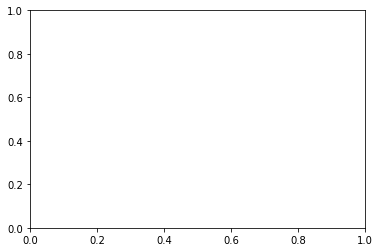

In [10]:
points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

plt.figure(1)
plt.plot(t,phi,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.show()